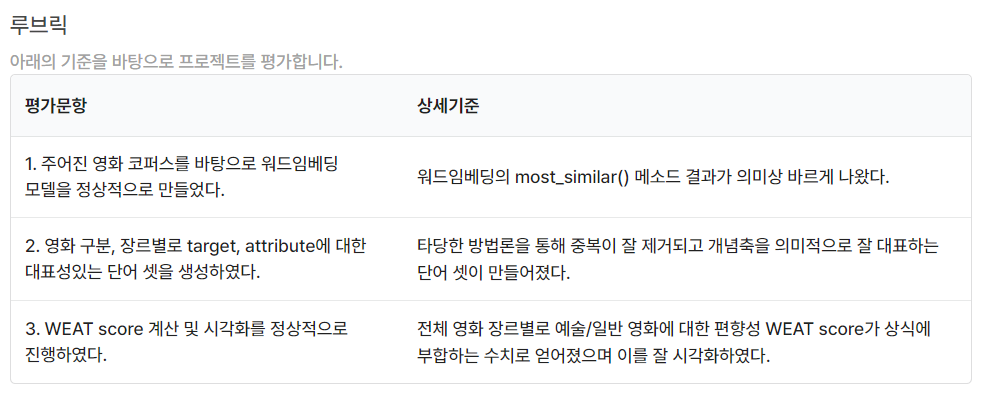

In [1]:
import konlpy
import gensim
import sklearn
import seaborn

영화 구분  
- synopsis_art.txt : 예술영화
- synopsis_gen.txt : 일반영화(상업영화)
- 그 외는 독립영화 등으로 분류됩니다.

장르 구분
- synopsis_SF.txt: SF
- synopsis_가족.txt: 가족
- synopsis_공연.txt: 공연
- synopsis_공포(호러).txt: 공포(호러)
- synopsis_기타.txt: 기타
- synopsis_다큐멘터리.txt: 다큐멘터리
- synopsis_드라마.txt: 드라마
- synopsis_멜로로맨스.txt: 멜로로맨스
- synopsis_뮤지컬.txt: 뮤지컬
- synopsis_미스터리.txt: 미스터리
- synopsis_범죄.txt: 범죄
- synopsis_사극.txt: 사극
- synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
- synopsis_성인물(에로).txt: 성인물(에로)
- synopsis_스릴러.txt: 스릴러
- synopsis_애니메이션.txt: 애니메이션
- synopsis_액션.txt: 액션
- synopsis_어드벤처.txt: 어드벤처
- synopsis_전쟁.txt: 전쟁
- synopsis_코미디.txt: 코미디
- synopsis_판타지.txt: 판타지

# X : 예술, Y : 일반 , A - U(21개) : 영화장르들

# STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [4]:
print(len(tokenized))

71156


# STEP 2. 추출된 결과로 embedding model 만들기

In [5]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.8887946009635925),
 ('다큐멘터리', 0.8570740818977356),
 ('드라마', 0.8192844986915588),
 ('영화로', 0.8003005385398865),
 ('코미디', 0.7815753221511841),
 ('주제', 0.7773131132125854),
 ('형식', 0.7767631411552429),
 ('소재', 0.772722601890564),
 ('편의', 0.7583299279212952),
 ('스토리', 0.7565820813179016)]

In [6]:
model.wv.most_similar(positive=['사랑'])

[('아르튬', 0.7292999029159546),
 ('첫사랑', 0.6960648894309998),
 ('만남', 0.6940243244171143),
 ('행복', 0.693061351776123),
 ('우정', 0.6894509792327881),
 ('진심', 0.6806037425994873),
 ('애정', 0.6799550652503967),
 ('이별', 0.676403820514679),
 ('실연', 0.6743667125701904),
 ('감정', 0.6737865209579468)]

# STEP 3. target, attribute 단어 셋 만들기

### Target
target_X : 예술영화의 단어 세트 / target_Y : 일반영화의 단어 세트

In [7]:
# 1. 각 파일 불러와 읽고
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt' 
gen_txt = 'synopsis_gen.txt' 

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)


In [8]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [10]:
# 2. 가장 빈도 높고 (TF 높은것), 유일하게 나오는 (IDF 높은것) 단어 찾기

# 두 개에 대해 각각 TF-IDF 만들고
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])  

# art, gen를 TF-IDF로 표현한 sparse matrix를 가져오고
m1 = X[0].tocoo()   
m2 = X[1].tocoo()   

# 각각 풀어서
w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

# art,gen를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬 
w1.sort(key=lambda x: x[1], reverse=True) 
w2.sort(key=lambda x: x[1], reverse=True)    



In [11]:
# 확인
print(X.shape)
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

(2, 41082)
23976
영화
예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [12]:
# 3. art, gen간의 중복단어 지우고, 상위 15개 단어만 추출

n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [13]:
# 확인
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


### Attribute
21개 장르 모두

In [14]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [15]:
# 1. 각 파일 불러와 읽고
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [16]:
# 2. 가장 빈도 높고 (TF 높은것), 유일하게 나오는 (IDF 높은것) 단어 찾기

# 두 개에 대해 각각 TF-IDF 만들고
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
print(X.shape)

(21, 42191)


In [17]:
# 장르별 TF-IDF로 표현한 sparse matrix를 가져와서, 풀고, 
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

# 구성하는 단어들을 TF-IDF가 높은 순으로 정렬 
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()  

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

# STEP 4. WEAT score 계산과 시각화

In [23]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B) # [X단어수만큼의 1차원, X-A, X-B와 거리행렬]
    s_Y = s(Y, A, B) # [Y단어수만큼의 행렬, Y-A, Y-B와 거리행렬] # X:꽃, Y:곤충, A:긍정, B:부정

    mean_X = np.mean(s_X) # X단어의 A,B 거리 평균값
    mean_Y = np.mean(s_Y) # Y단어의 A,B 거리 평균값
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev   

print(round(weat_score(X, Y, A, B), 3))

-0.46


In [24]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [25]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [30]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        weat_score.append([genre_name[i], genre_name[j],matrix[i][j]])
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.46000764
SF 공연 -0.38946488
SF 공포(호러) -0.63203657
SF 기타 0.3614206
SF 다큐멘터리 0.59437275
SF 드라마 -0.32553884
SF 멜로로맨스 -0.77833647
SF 뮤지컬 0.33890048
SF 미스터리 -0.6774792
SF 범죄 -0.2064094
SF 사극 -0.8283143
SF 서부극(웨스턴) -0.38084874
SF 성인물(에로) -0.5778821
SF 스릴러 -0.500407
SF 애니메이션 0.37639308
SF 액션 -0.41392353
SF 어드벤처 -0.729852
SF 전쟁 0.27372235
SF 코미디 -0.3683675
SF 판타지 -0.11492669
가족 공연 0.11084202
가족 공포(호러) -0.15612514
가족 기타 0.7329061
가족 다큐멘터리 0.8144626
가족 드라마 0.2129152
가족 멜로로맨스 -0.6293398
가족 뮤지컬 0.67607945
가족 미스터리 -0.32884163
가족 범죄 0.19708923
가족 사극 -0.12814543
가족 서부극(웨스턴) 0.36461774
가족 성인물(에로) -0.35908026
가족 스릴러 -0.14469267
가족 애니메이션 0.8457578
가족 액션 0.10800663
가족 어드벤처 -0.055479623
가족 전쟁 0.6278337
가족 코미디 0.22956988
가족 판타지 0.43239978
공연 공포(호러) -0.1968851
공연 기타 0.9228742
공연 다큐멘터리 0.91653264
공연 드라마 0.1196647
공연 멜로로맨스 -0.6883139
공연 뮤지컬 0.8710785
공연 미스터리 -0.33956298
공연 범죄 0.115517914
공연 사극 -0.3375359
공연 서부극(웨스턴) 0.10901602
공연 성인물(에로) -0.48206937
공연 스릴러 -0.18353638
공연 애니메이션 0.9039289
공연 액션 0.019933

In [61]:
print('예술영화와 가까운 장르 :')
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] >= 0.8 :
            print([genre_name[i], genre_name[j],matrix[i][j]])

예술영화와 가까운 장르 :
['가족', '다큐멘터리', 0.8144626]
['가족', '애니메이션', 0.8457578]
['공연', '기타', 0.9228742]
['공연', '다큐멘터리', 0.91653264]
['공연', '뮤지컬', 0.8710785]
['공연', '애니메이션', 0.9039289]
['드라마', '애니메이션', 0.86329126]
['멜로로맨스', '뮤지컬', 0.8508399]
['멜로로맨스', '범죄', 0.85351294]
['멜로로맨스', '애니메이션', 0.8664341]
['멜로로맨스', '전쟁', 0.8018762]
['멜로로맨스', '코미디', 0.9172461]
['멜로로맨스', '판타지', 0.8343844]
['미스터리', '범죄', 1.0358236]
['미스터리', '스릴러', 0.82885516]
['미스터리', '액션', 0.8206243]
['사극', '애니메이션', 0.8311445]
['사극', '전쟁', 0.89343405]


### 예술영화에 가까운 장르순서 
멜로로맨스>>공연>>미스터리>>사극,가족>>드라마

In [62]:
print('일반영화와 가까운 장르 :')
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] <= -0.8 :
            print([genre_name[i], genre_name[j],matrix[i][j]])

일반영화와 가까운 장르 :
['SF', '사극', -0.8283143]
['기타', '드라마', -0.87350965]
['기타', '멜로로맨스', -0.88618505]
['기타', '사극', -0.82776326]
['기타', '성인물(에로)', -0.82105726]
['다큐멘터리', '드라마', -0.89903665]
['다큐멘터리', '멜로로맨스', -0.8885682]
['다큐멘터리', '사극', -0.8996659]
['다큐멘터리', '성인물(에로)', -0.8335491]
['다큐멘터리', '어드벤처', -0.92962295]
['다큐멘터리', '코미디', -0.80006987]
['다큐멘터리', '판타지', -0.87704647]
['드라마', '멜로로맨스', -0.8395152]
['범죄', '스릴러', -0.96134496]
['애니메이션', '어드벤처', -0.878463]


### 일반영화에 가까운 장르순서 
다큐멘터리>>기타>>범죄,애니메이젼,드라마,SF

<AxesSubplot:>

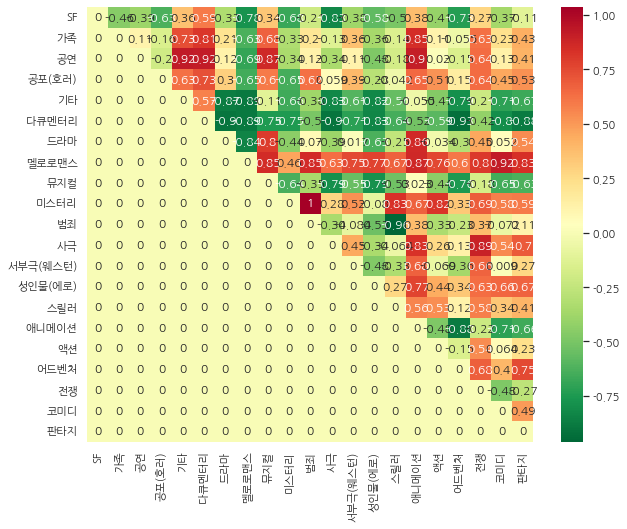

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 8))
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 회고

예술영화에 가까운 장르순서
멜로로맨스>>공연>>미스터리>>사극,가족>>드라마

일반영화에 가까운 장르순서
다큐멘터리>>기타>>범죄,애니메이션,드라마,SF

라고 나왔지만, heatmap을 그려보니 색상으로 구분되어 이건 좀 그렇네 하는 것들이 있었다.  
예를 들어,  
예술영화와 일반영화에 모두 절대값 0.8 이상으로 추출된 드라마 장르는 어디에도 가깝지 않다고 결론내릴 수 있었고,

일반영화에 가까운 장르 중, 범죄, 애니메이션, SF가 동일 수준으로 나왔지만, 애니메이션과 SF가 범죄보다는 좀 더 여러장르에 걸쳐 일반영화에 가깝다고 해석할 수 있었다.


재밌었다. 편향성.  
그런데 결과를 해석하는 부분에 있어 두 장르의 연관점수가 들어오니 조금 헷갈린다.


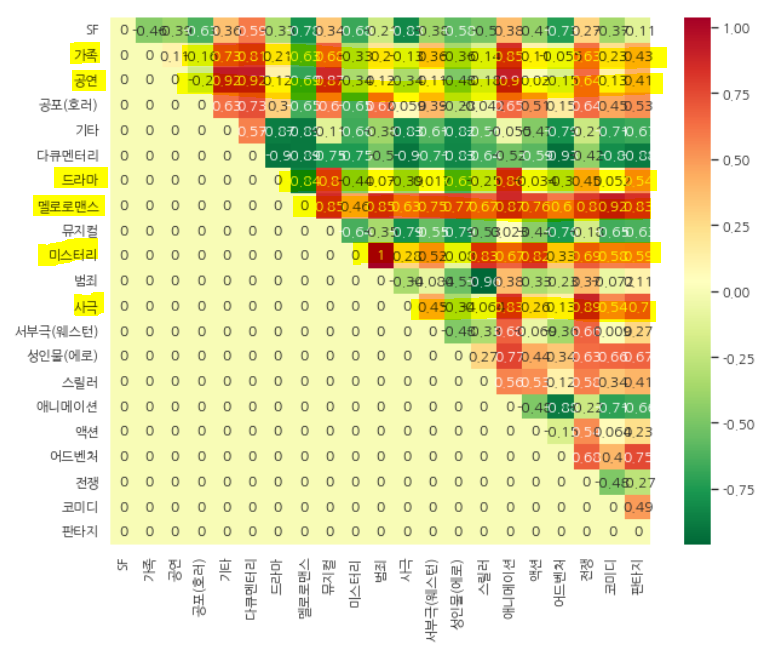

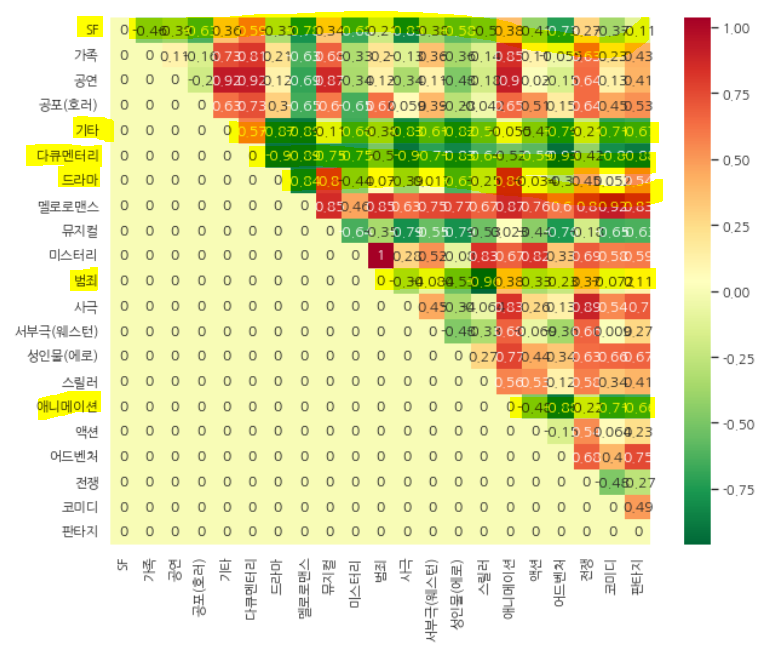

In [72]:
drama_scores = []
for score in weat_score:
    if score[0] == genre_name[i]:
        drama_scores.append(score[2])

if len(drama_scores) > 0:
    avg_drama_score = sum(drama_scores) / len(drama_scores)
    print(avg_drama_score)
else:
    print("No scores found for '드라마'")

0.49093782901763916
